# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [3]:
import pandas as pd
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [5]:
ds = pd.read_csv('Real_estate.csv')
ds.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [10]:
samples, columns = ds.shape

print(ds.shape)



(414, 8)


### What are the features available in the dataset?

In [12]:
ds.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [14]:
ds.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [16]:
X = ds
print(X.head())
#not sure about this


   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

### Group feature(s) as independent features in y

In [18]:
y = ds["Y house price of unit area"]
print(y.head())

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64


### Split the dataset into train and test data

In [30]:
from sklearn.model_selection import train_test_split

X = ds.drop(columns=["Y house price of unit area"])
y = ds["Y house price of unit area"]

#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (331, 7)
X_test shape: (83, 7)
y_train shape: (331,)
y_test shape: (83,)


### Choose the model (Linear Regression)

In [34]:
from sklearn.linear_model import LinearRegression



### Create an Estimator object

In [36]:
model = LinearRegression()

### Train the model

In [38]:
model.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [51]:
y_pred = model.predict(X_test)

print("Predicted house prices: ", y_pred[:5])

Predicted house prices:  [47.04645871 40.40783016 43.37463978 39.20600382 26.62817953]


### Display the coefficients

In [49]:
print("Coefficients: ", model.coef_)

Coefficients:  [-5.61695287e-03  5.40743502e+00 -2.67827999e-01 -4.81543315e-03
  1.08114445e+00  2.26048799e+02 -3.01254914e+01]


### Find how well the trained model did with testing data

In [53]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("r2 Score : ", r2)

r2 Score :  0.6745228670350747


### Plot House Age Vs Price
#### Hint: Use regplot in sns

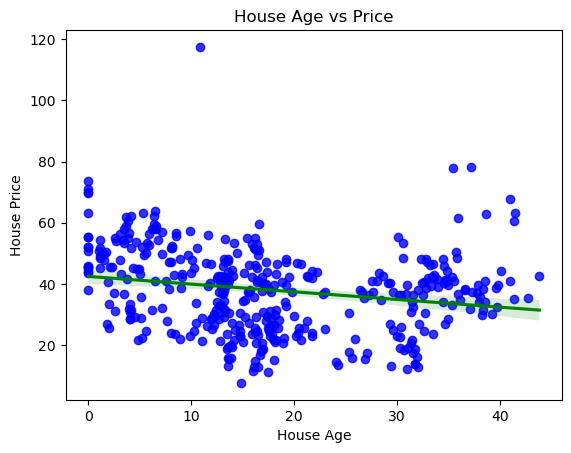

In [77]:
import matplotlib.pyplot as plt

sns.regplot(x="X2 house age", y="Y house price of unit area", data=ds, scatter_kws={'color':'blue'}, line_kws={'color': 'green'})

plt.title('House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('House Price')

plt.show()

### Plot Distance to MRT station Vs Price

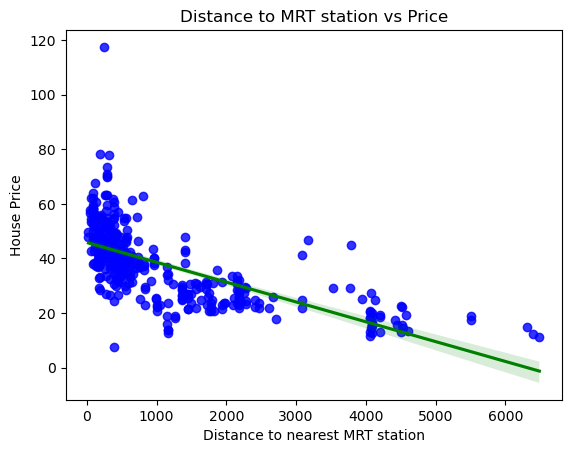

In [79]:
sns.regplot(x="X3 distance to the nearest MRT station", y="Y house price of unit area", data=ds, scatter_kws={'color': 'blue'}, line_kws={'color': 'green'})

plt.title('Distance to MRT station vs Price')
plt.xlabel("Distance to nearest MRT station")
plt.ylabel('House Price')

plt.show()

### Plot Number of Convienience Stores Vs Price

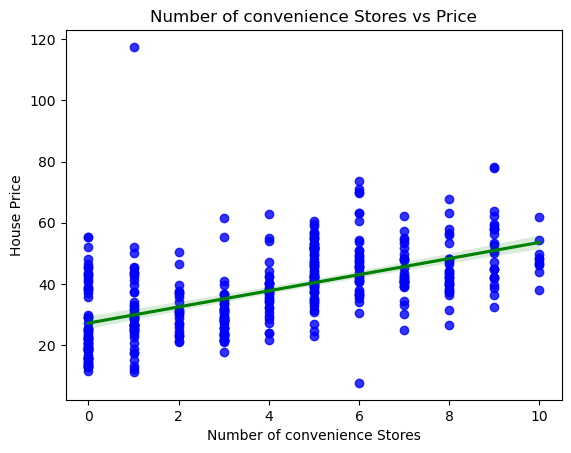

In [83]:
sns.regplot(x='X4 number of convenience stores', y='Y house price of unit area', data=ds, scatter_kws={'color': 'blue'}, line_kws={'color': 'green'})

plt.title('Number of convenience Stores vs Price')
plt.xlabel('Number of convenience Stores')
plt.ylabel('House Price')

plt.show()